In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.externals.six import StringIO
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [145]:
r=r'winequality-red.csv'
Datos=pd.read_csv(r,sep=";")

In [172]:
X=Datos.drop("quality",axis=1).values
y=Datos["quality"].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=127)

In [173]:
scaler=preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [179]:
lda= LinearDiscriminantAnalysis()
X_r2=lda.fit(X_train_scaled,y_train).transform(X_train_scaled)

In [180]:
lda.fit(X_train_scaled,y_train)
predict=lda.predict(X_test_scaled)

print(confusion_matrix(predict,y_test))
print(classification_report(y_test,predict))

[[  1   0   0   0   0   0]
 [  0   1   2   0   0   0]
 [  0   7 105  41   3   0]
 [  0   4  35  63  15   2]
 [  0   0   1  17  21   1]
 [  0   0   0   1   0   0]]
             precision    recall  f1-score   support

          3       1.00      1.00      1.00         1
          4       0.33      0.08      0.13        12
          5       0.67      0.73      0.70       143
          6       0.53      0.52      0.52       122
          7       0.53      0.54      0.53        39
          8       0.00      0.00      0.00         3

avg / total       0.58      0.60      0.59       320



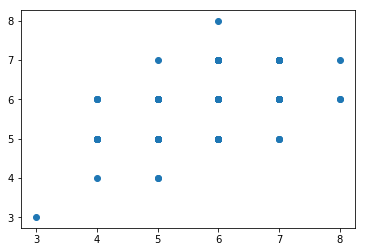

In [182]:
plt.scatter(y_test,predict)
plt.show()